In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path_dataset="/content/Data_Project.csv"

In [3]:
data = pd.read_csv("/content/Data_Project.csv")
data

,student_id,hours_studied,previous_score,extracurricular_activities,sleep_hours,sample_question,performance_index
0,3427127,1.0,49.0,Yes,7.0,3.0,24.0
1,3425166,7.0,75.0,No,6.0,6.0,67.0
2,3428492,5.0,NaN,Yes,5.0,2.0,41.0
3,3425393,7.0,93.0,No,9.0,3.0,84.0
4,3426412,4.0,46.0,Yes,9.0,3.0,28.0
...,...,...,...,...,...,...,...
10002,3428039,1.0,49.0,Yes,4.0,2.0,23.0
10003,3427337,7.0,64.0,Yes,8.0,5.0,58.0
10004,3426208,6.0,83.0,Yes,8.0,5.0,74.0
10005,3424059,9.0,97.0,Yes,7.0,0.0,95.0


###Data Cleaning

In [4]:
data.count()

student_id                    10007
hours_studied                  9958
previous_score                 9883
extracurricular_activities     9958
sleep_hours                    9958
sample_question                9958
performance_index              9958
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  10007 non-null  int64  
 1   hours_studied               9958 non-null   float64
 2   previous_score              9883 non-null   float64
 3   extracurricular_activities  9958 non-null   object 
 4   sleep_hours                 9958 non-null   float64
 5   sample_question             9958 non-null   float64
 6   performance_index           9958 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 547.4+ KB


In [6]:
data.describe()

,student_id,hours_studied,previous_score,sleep_hours,sample_question,performance_index
count,1.000700e+04,9958.000000,9883.000000,9958.000000,9958.000000,9958.000000
mean,3.425001e+06,4.994577,69.430942,6.531231,4.584354,55.213597
std,2.886661e+03,2.589286,17.350225,1.696809,2.866496,19.213538
min,3.420001e+06,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.422500e+06,3.000000,54.000000,5.000000,2.000000,40.000000
50%,3.425002e+06,5.000000,69.000000,7.000000,5.000000,55.000000
75%,3.427500e+06,7.000000,85.000000,8.000000,7.000000,71.000000
max,3.430000e+06,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#untuk keperluan pembuatan grafik
import matplotlib.pyplot as plt
import seaborn as sns



Mengidentifikasi outlier dengan boxplot

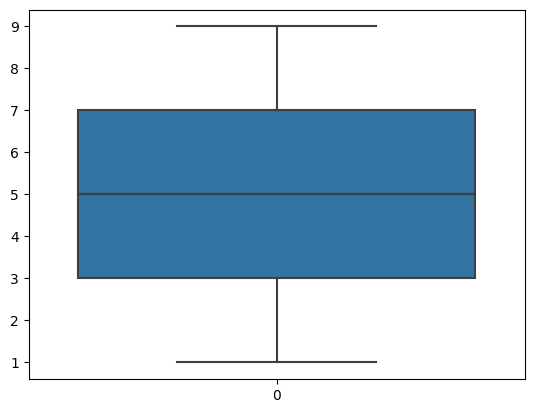

In [8]:
sns.boxplot(data['hours_studied'])
plt.show()

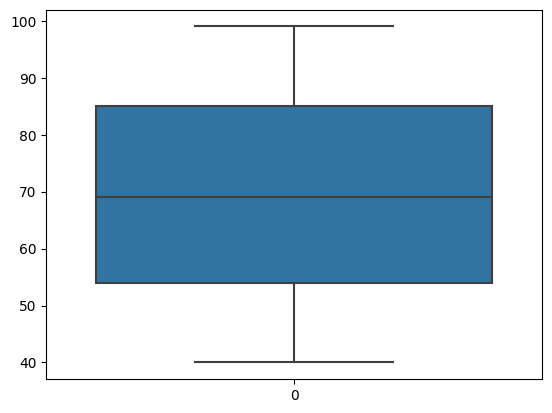

In [9]:
sns.boxplot(data['previous_score'])
plt.show()

In [10]:
#sns.boxplot(data['extracurricular_activities'])
#plt.show()

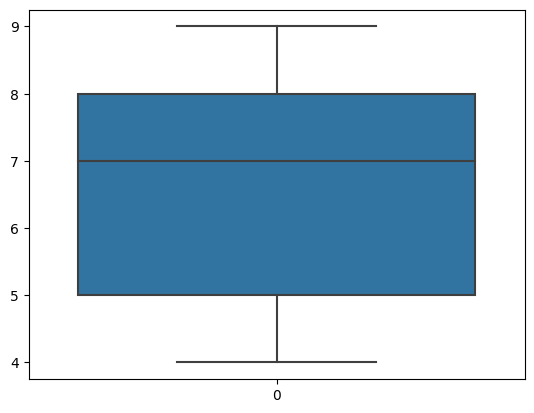

In [11]:
sns.boxplot(data['sleep_hours'])
plt.show()

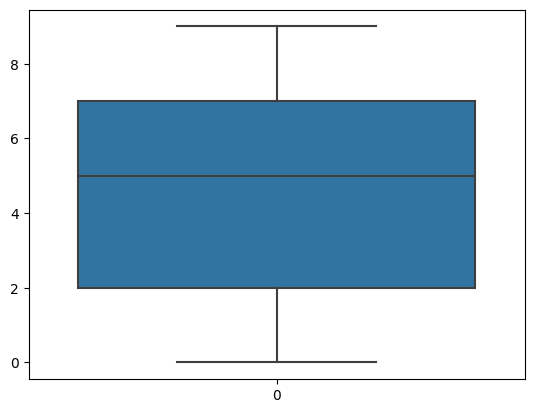

In [12]:
sns.boxplot(data['sample_question'])
plt.show()

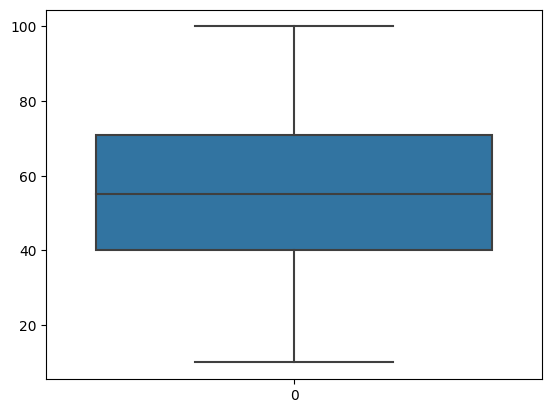

In [13]:
sns.boxplot(data['performance_index'])
plt.show()

In [14]:
#number of NA each variable
np.sum(data.isnull())

student_id                      0
hours_studied                  49
previous_score                124
extracurricular_activities     49
sleep_hours                    49
sample_question                49
performance_index              49
dtype: int64

In [15]:
#fill missing value with mean
data['hours_studied']=data['hours_studied'].fillna((data['hours_studied'].mean()))
data['previous_score']=data['previous_score'].fillna((data['previous_score'].mean()))
data['sleep_hours']=data['sleep_hours'].fillna((data['sleep_hours'].mean()))
data['sample_question']=data['sample_question'].fillna((data['sample_question'].mean()))
data['performance_index']=data['performance_index'].fillna((data['performance_index'].mean()))
np.sum(data.isnull())


student_id                     0
hours_studied                  0
previous_score                 0
extracurricular_activities    49
sleep_hours                    0
sample_question                0
performance_index              0
dtype: int64

In [16]:
#fill missing value with mode for qualitative / categorical data
data['extracurricular_activities']=data['extracurricular_activities'].fillna(data['extracurricular_activities'].mode()[0])

np.sum(data.isnull())

student_id                    0
hours_studied                 0
previous_score                0
extracurricular_activities    0
sleep_hours                   0
sample_question               0
performance_index             0
dtype: int64

In [17]:
from scipy import stats

In [18]:

z1 = np.abs(stats.zscore(data['hours_studied']))
print(z1)


0        1.546602
1        0.776450
2        0.002100
3        0.776450
4        0.385076
           ...   
10002    1.546602
10003    0.776450
10004    0.389275
10005    1.550801
10006    0.776450
Name: hours_studied, Length: 10007, dtype: float64


In [19]:
z2 = np.abs(stats.zscore(data['previous_score']))
print(z2)

0        1.184985e+00
1        3.230027e-01
2        8.242228e-16
3        1.366994e+00
4        1.358983e+00
             ...     
10002    1.184985e+00
10003    3.149920e-01
10004    7.869989e-01
10005    1.598992e+00
10006    2.650032e-01
Name: previous_score, Length: 10007, dtype: float64


In [53]:
z3 = np.abs(stats.zscore(data['sleep_hours']))
print(z3)

0        0.276958
1        0.313862
2        0.904681
3        1.458597
4        1.458597
           ...   
10002    1.495501
10003    0.867777
10004    0.867777
10005    0.276958
10006    0.867777
Name: sleep_hours, Length: 10007, dtype: float64


In [21]:
z4 = np.abs(stats.zscore(data['sample_question']))
print(z4)

0        0.554101
1        0.495098
2        0.903834
3        0.554101
4        0.554101
           ...   
10002    0.903834
10003    0.145365
10004    0.145365
10005    1.603299
10006    1.253566
Name: sample_question, Length: 10007, dtype: float64


In [22]:
z5 = np.abs(stats.zscore(data['performance_index']))
print(z5)

0        1.628637
1        0.614981
2        0.741625
3        1.501992
4        1.419928
           ...   
10002    1.680814
10003    0.145387
10004    0.980221
10005    2.075941
10006    0.458449
Name: performance_index, Length: 10007, dtype: float64


In [23]:
# Menampilkan data outlier
print(np.where(z1 > 3))
print(np.where(z2 > 3))
print(np.where(z3 > 3))
print(np.where(z4 > 3))


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  10007 non-null  int64  
 1   hours_studied               10007 non-null  float64
 2   previous_score              10007 non-null  float64
 3   extracurricular_activities  10007 non-null  object 
 4   sleep_hours                 10007 non-null  float64
 5   sample_question             10007 non-null  float64
 6   performance_index           10007 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 547.4+ KB


Dikarenakan sudah tidak ada outlier, maka datanya sudah bersih


###DATA VISUALISASI

In [25]:
data.corr()

<ipython-input-25-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,student_id,hours_studied,previous_score,sleep_hours,sample_question,performance_index
student_id,1.000000,-0.022438,-0.013871,0.025535,-0.000809,-0.020622
hours_studied,-0.022438,1.000000,-0.011386,0.001159,0.016746,0.372847
previous_score,-0.013871,-0.011386,1.000000,0.004189,0.008174,0.912251
sleep_hours,0.025535,0.001159,0.004189,1.000000,0.004166,0.047946
sample_question,-0.000809,0.016746,0.008174,0.004166,1.000000,0.043105
performance_index,-0.020622,0.372847,0.912251,0.047946,0.043105,1.000000


<ipython-input-26-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

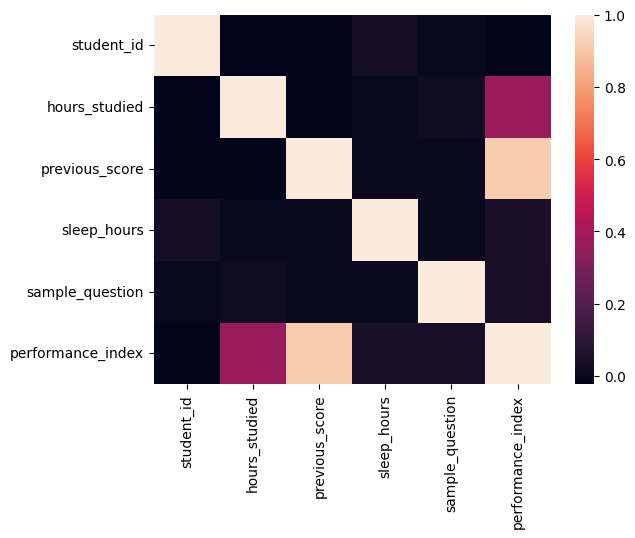

In [26]:
sns.heatmap(data.corr())

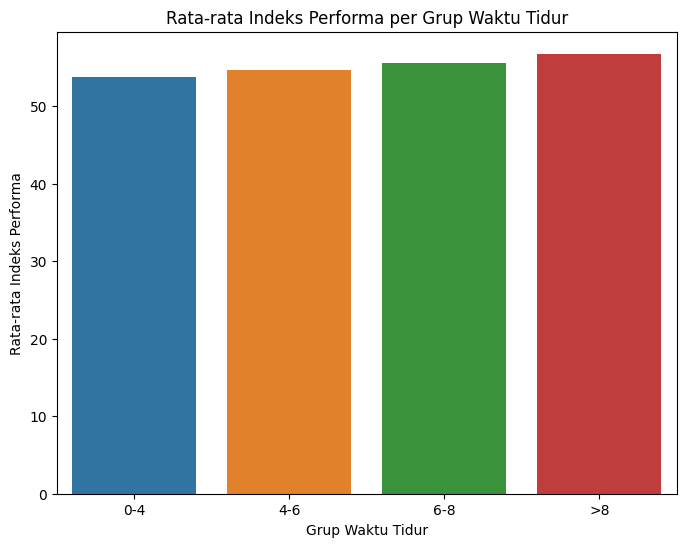

In [27]:
# Mengelompokkan lama waktu tidur siswa
sleep_bins = [0, 4, 6, 8, float('inf')]
sleep_labels = ['0-4', '4-6', '6-8', '>8']
data['sleep_time_group'] = pd.cut(data['sleep_hours'], bins=sleep_bins, labels=sleep_labels)

# Menghitung rata-rata indeks performa berdasarkan grup lama waktu tidur
grouped_sleep_data = data.groupby('sleep_time_group')['performance_index'].mean()

# Visualisasi: Rata-rata Indeks Performa per Grup Waktu Tidur
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_sleep_data.index, y=grouped_sleep_data.values)
plt.title('Rata-rata Indeks Performa per Grup Waktu Tidur')
plt.xlabel('Grup Waktu Tidur')
plt.ylabel('Rata-rata Indeks Performa')
plt.show()


In [28]:
# Korelasi antara grup lama waktu tidur dengan indeks performa
correlation_sleep = data['sleep_hours'].corr(data['performance_index'])
print(f"Korelasi antara Lama Waktu Tidur dan Indeks Performa: {correlation_sleep}")

Korelasi antara Lama Waktu Tidur dan Indeks Performa: 0.047946236260932244


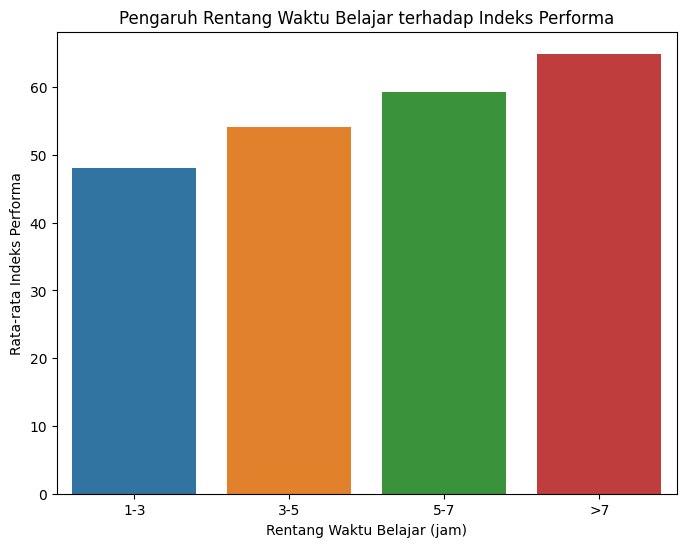

In [29]:
# Mengelompokkan lama waktu belajar siswa
bins = [1, 3, 5, 7, float('inf')]
labels = ['1-3', '3-5', '5-7', '>7']
data['rentang_waktu'] = pd.cut(data['hours_studied'], bins=bins, labels=labels)

# Menghitung rata-rata indeks performa berdasarkan rentang lama waktu belajar
grouped_data = data.groupby('rentang_waktu')['performance_index'].mean()

# Visualisasi: Rata-rata Indeks Performa per Grup Waktu Belajar
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('Pengaruh Rentang Waktu Belajar terhadap Indeks Performa')
plt.xlabel('Rentang Waktu Belajar (jam)')
plt.ylabel('Rata-rata Indeks Performa')
plt.show()


In [30]:
correlation = data['hours_studied'].corr(data['performance_index'])
print(f"Korelasi antara Lama Waktu Belajar dan Indeks Performa: {correlation}")

Korelasi antara Lama Waktu Belajar dan Indeks Performa: 0.37284745526659474


### Pembuatan dan Evaluasi Model

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   student_id                  10007 non-null  int64   
 1   hours_studied               10007 non-null  float64 
 2   previous_score              10007 non-null  float64 
 3   extracurricular_activities  10007 non-null  object  
 4   sleep_hours                 10007 non-null  float64 
 5   sample_question             10007 non-null  float64 
 6   performance_index           10007 non-null  float64 
 7   sleep_time_group            10007 non-null  category
 8   rentang_waktu               8858 non-null   category
dtypes: category(2), float64(5), int64(1), object(1)
memory usage: 567.3+ KB


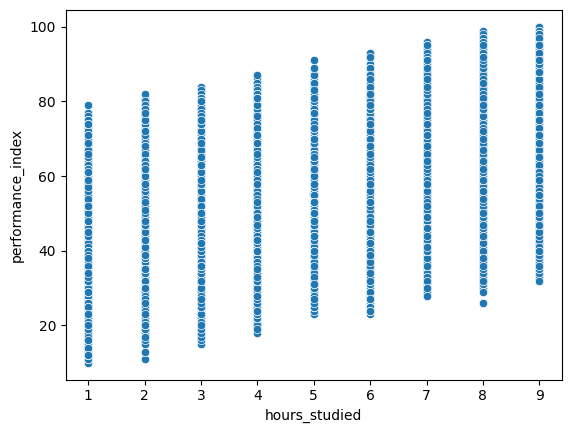

In [32]:
sns.scatterplot(data, x='hours_studied', y='performance_index');
#scatterplot : merupakan jenis visualisasi data yang berguna untuk mengetahui pola hubungan dua variabel numerik

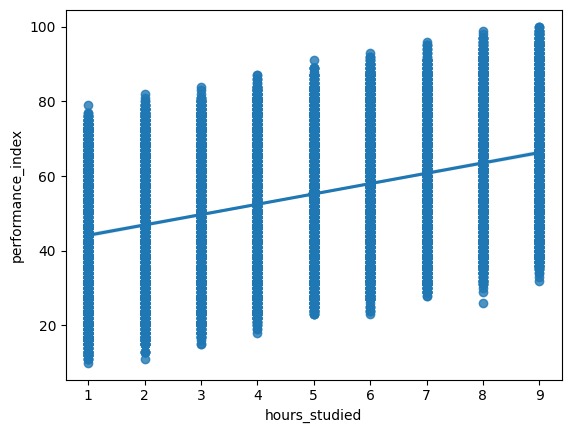

In [33]:
sns.regplot(data, x='hours_studied', y='performance_index');

0.37284745526659474

In [36]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [38]:
X = data[['hours_studied']]

y = data['performance_index']

X1 = sm.add_constant(X)
X1.head()

,const,hours_studied
0,1.0,1.0
1,1.0,7.0
2,1.0,5.0
3,1.0,7.0
4,1.0,4.0


In [39]:
model = sm.OLS(y, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1615.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:12:29   Log-Likelihood:                -43002.
No. Observations:               10007   AIC:                         8.601e+04
Df Residuals:                   10005   BIC:                         8.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.3952      0.387    106.949

R-squared sebesar 0.139 menunjukkan bahwa variabel "hours_studied" berpengaruh sebesar 13.9% terhadap variabel "performance_index".

Sedangkan nilai p-value di kolom "P>|t|" yang kurang dari 0.05 menunjukkan bahwa variabel tersebut signifikan.

In [40]:
a=model.params['const']
print(a)

41.39521109162335


In [41]:
b=model.params['hours_studied']
print(b)

2.7666778178706406


In [42]:
print(f'y={a}+{b}x')

y=41.39521109162335+2.7666778178706406x


In [43]:
# Uji Asumsi Homoskedastisitas (Gunakan uji Breusch-Pagan)
residual=model.resid
homoskedastisitas_test = sms.het_breuschpagan(residual, X1)
print(f'Homoskedastisitas Test: {homoskedastisitas_test}')
#Nilai p-value yang tinggi menunjukkan homoskedastisitas.

Homoskedastisitas Test: (0.005542688445299926, 0.9406529343894423, 0.005541583752707344, 0.9406603261226355)


In [44]:
# Uji asumsi independensi
durbin_watson_statistic = sms.durbin_watson(residual)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 1.9961540061020995


In [45]:
# Uji asumsi normalitas residual
from scipy import stats
# Hitung statistik uji dan p-value
kstest_statistic, kstest_pvalue = stats.kstest(residual, 'norm')

print(f"Kolmogorov-Smirnov Statistic: {kstest_statistic}")
print(f"P-Value: {kstest_pvalue}")

Kolmogorov-Smirnov Statistic: 0.4555665377498931
P-Value: 0.0


In [46]:
# y_actual (nilai tip dari dataset)
data['performance_index'].head()

0    24.0
1    67.0
2    41.0
3    84.0
4    28.0
Name: performance_index, dtype: float64

In [47]:
# y_pred (nilai tip hasil prediksi)
y_pred = model.predict(X1)
y_pred.head()

0    44.161889
1    60.761956
2    55.228600
3    60.761956
4    52.461922
dtype: float64

In [48]:
# Disatukan dalam dataframe
tips_result = pd.DataFrame({
    'y_actual': data['performance_index'],
    'y_pred': y_pred
})

tips_result.head()

,y_actual,y_pred
0,24.0,44.161889
1,67.0,60.761956
2,41.0,55.228600
3,84.0,60.761956
4,28.0,52.461922


In [49]:
# Error (Residual)
error = tips_result['y_actual'] - tips_result['y_pred']

tips_result['error'] = error
tips_result.head()

,y_actual,y_pred,error
0,24.0,44.161889,-20.161889
1,67.0,60.761956,6.238044
2,41.0,55.228600,-14.228600
3,84.0,60.761956,23.238044
4,28.0,52.461922,-24.461922


In [50]:
# Squared Error
tips_result['squared_error'] = tips_result['error'] ** 2
tips_result.head()

,y_actual,y_pred,error,squared_error
0,24.0,44.161889,-20.161889,406.501764
1,67.0,60.761956,6.238044,38.913195
2,41.0,55.228600,-14.228600,202.453063
3,84.0,60.761956,23.238044,540.006697
4,28.0,52.461922,-24.461922,598.385646


In [51]:
# MSE (Mean Squared Error)
MSE = tips_result['squared_error'].mean()
MSE

316.2530936355264

In [52]:
# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
RMSE

17.78350622446334